# Exploring Housing Prices in California

## Introduction

This notebook seeks to explore the complex dynamics of California's housing market through the application of regression analysis. By utilizing statistical techniques, particularly regression analysis, the correlations between various factors and housing prices is uncovered. Regression analysis enables us to quantify the influence of different variables on housing prices and gain insights into how these factors interplay with one another.

The dataset utilized here is a modified version of the California Housing dataset sourced from Luís Torgo's page at the University of Porto, curated by Aurélien Géron. While closely resembling the original dataset, this version incorporates two alterations:

1. Removal of 207 randomly selected values from the total_bedrooms column, facilitating discussions on addressing missing data.
2. Introduction of an additional categorical attribute named ocean_proximity, providing a rough indication of whether each block group is situated near the ocean, Bay area, inland, or on an island. This inclusion prompts considerations regarding the treatment of categorical data.

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy import stats

## Data Exploration

In [2]:
# Load dataset
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Find categories in `ocean_proximity` column

In [4]:
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

## Descriptive Statistics

In [5]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Plot Histogram for Each Column

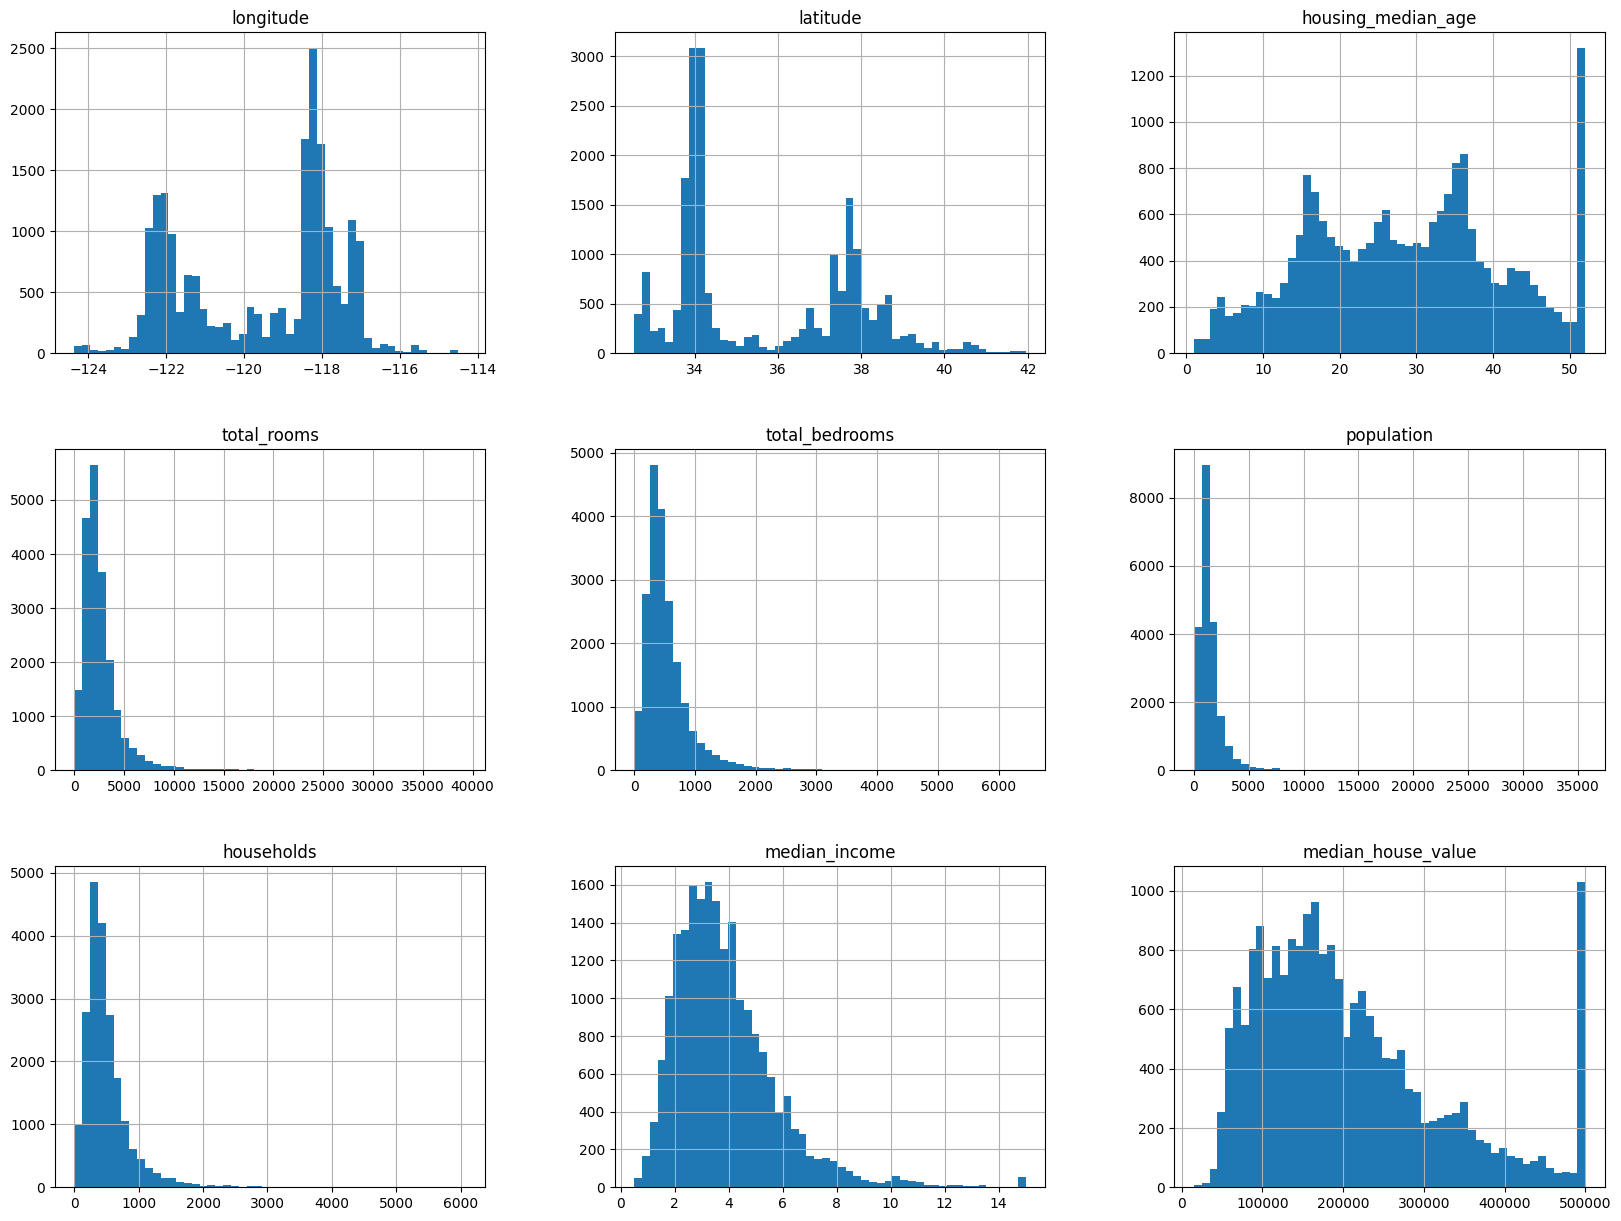

In [6]:
%matplotlib inline

data.hist(bins=50, figsize=(20, 15))
plt.show()

`median_income` is capped between 0.5 and 15 and it is represented in tens of thousands of dollars.
`housing_median_age` and `median_house_value` are capped as well.

## Split Data Into Train and Test Sets

In [7]:
# Random sampling method
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


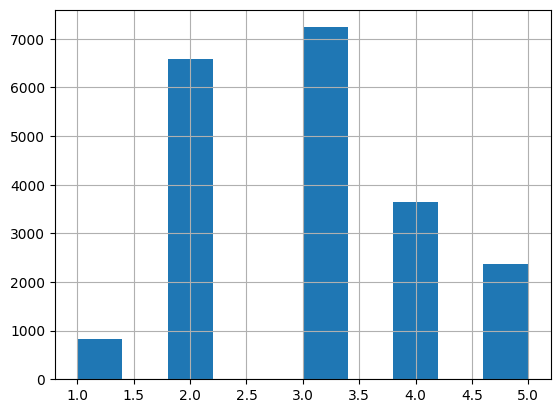

In [8]:
# Stratified sampling - to preserve better representation of the population subgroups (strata) are formed and the right number
# of instances are sampled from each stratum to guarantee that the test set is representative of the overall population.

# Add income category attribute that contain 5 categories where the most `median_income` falls.
data['income_cat'] = pd.cut(data['median_income'], bins=[0, 1.5, 3, 4.5, 6, np.inf], labels=[1, 2, 3, 4, 5])
data['income_cat'].hist()
plt.show()

In [9]:
# Stratified sampling based on the income category
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data['income_cat']):
    strata_train_set = data.loc[train_index]
    strata_test_set = data.loc[test_index]

print(f"Income category proportions in the test set:\n{strata_test_set['income_cat'].value_counts() / len(strata_test_set)}")

Income category proportions in the test set:
income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64


In [10]:
# Compare income category proportions for overall dataset, test set generated using stratified and random sampling techniques.
def income_cat_prop(dataset):
    return dataset['income_cat'].value_counts() / len(dataset)

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

compare_prop = pd.DataFrame({
    "Overall": income_cat_prop(data),
    "Stratified": income_cat_prop(strata_test_set),
    "Random": income_cat_prop(test_set),
}).sort_index()
compare_prop["Strat. %error"] = compare_prop["Stratified"] / compare_prop["Overall"] * 100 - 100
compare_prop["Rand. %error"] = compare_prop["Random"] / compare_prop["Overall"] * 100 - 100

In [11]:
compare_prop

,Overall,Stratified,Random,Strat. %error,Rand. %error
income_cat,,,,,
1,0.039826,0.039971,0.040213,0.364964,0.973236
2,0.318847,0.318798,0.324370,-0.015195,1.732260
3,0.350581,0.350533,0.358527,-0.013820,2.266446
4,0.176308,0.176357,0.167393,0.027480,-5.056334
5,0.114438,0.114341,0.109496,-0.084674,-4.318374


The proportions of the test set are very similar to the overall dataset when stratified sampling is used compared to random sampling.

In [12]:
# Remove income category to go back to the original dataset.
for data in (strata_train_set, strata_test_set):
    data.drop("income_cat", axis=1, inplace=True)

## Explore Training Set

In [13]:
# Make a copy of training set for exploration
housing = strata_train_set.copy()

### Visualize Geographical Data

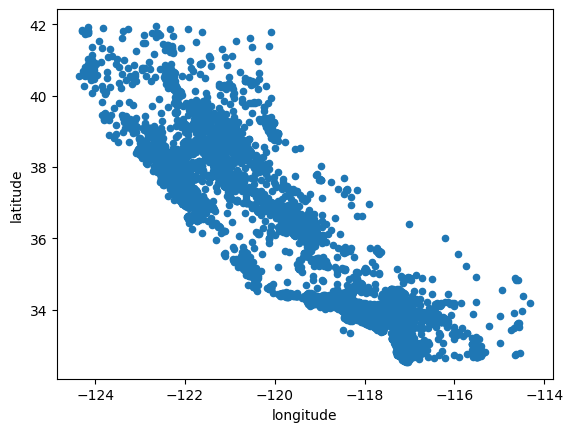

In [14]:
housing.plot(x='longitude', y='latitude', kind='scatter')
plt.show()

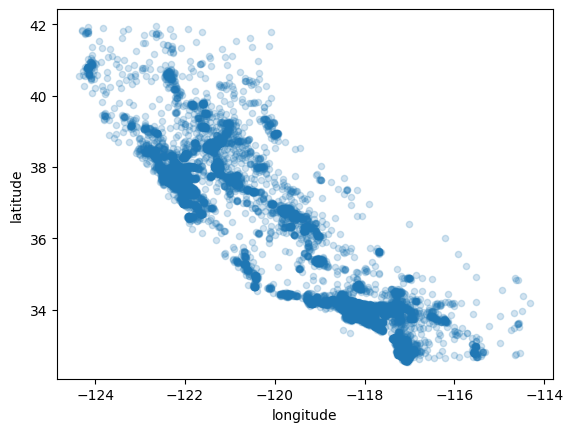

In [15]:
# Visualize high density of data points
housing.plot(x='longitude', y='latitude', kind='scatter', alpha=0.2)
plt.show()

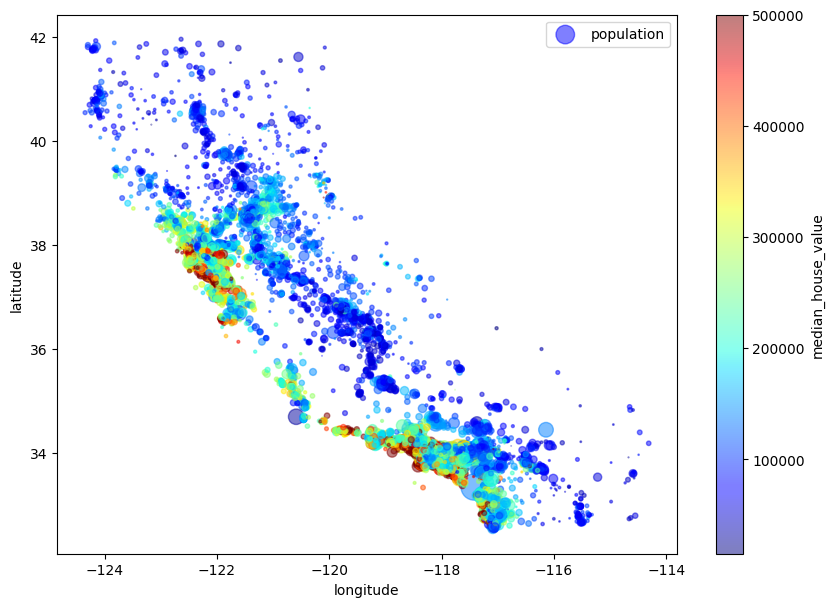

In [16]:
# Visualize housing prices color coded from low to high (c) and have size of circles to vary with the population of district (s)
housing.plot(x='longitude', y='latitude', kind='scatter', alpha=0.5, figsize=(10, 7),
            s=housing['population']/100, c='median_house_value', label='population',
            cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()
plt.show()

The price of house is highly related to the location and density of population.

### Correlation Exploration

In [17]:
housing = housing.iloc[:, :-1]
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0


In [18]:
# Compute the standard correlation coefficient, Pearson's r, between every attributes.
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


In [19]:
# Compute correlation between `median_house_value` and other attributes
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='housing_median_age', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housing_median_age'>,
        <Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>],
       [<Axes: xlabel='housing_median_age', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>],
       [<Axes: xlabel='housing_median_age', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>],
       [<Axes: xlabel='housing_median_age', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='median_house_value'

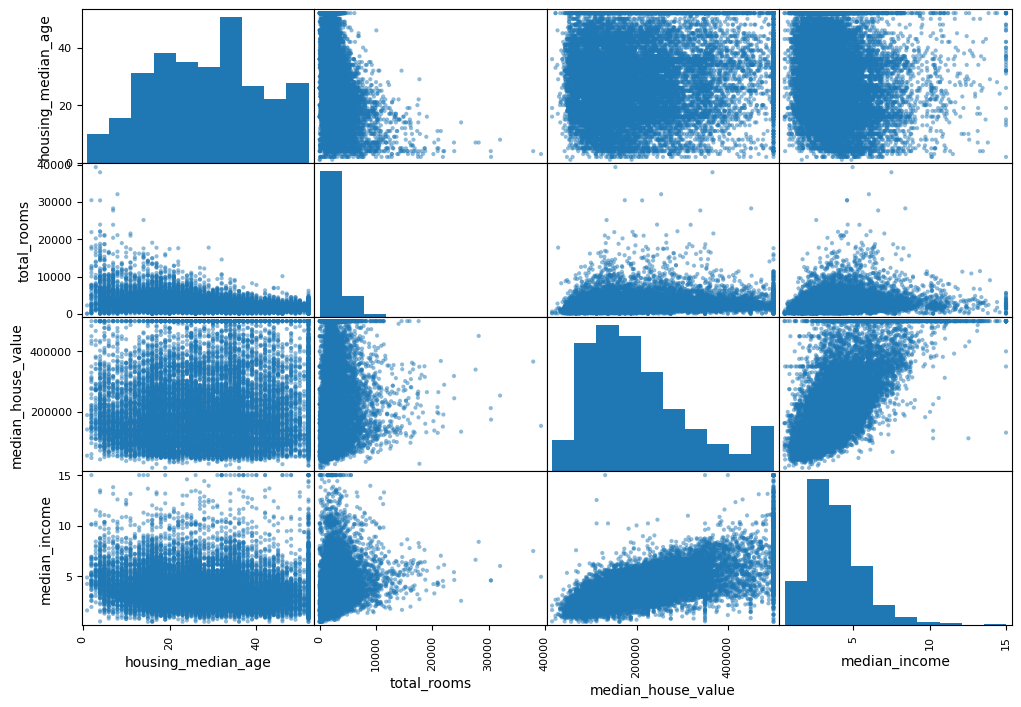

In [20]:
# Scatter matrix plots for chosen attributes
features = ["housing_median_age", "total_rooms", "median_house_value", "median_income"]
scatter_matrix(housing[features], figsize=(12, 8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

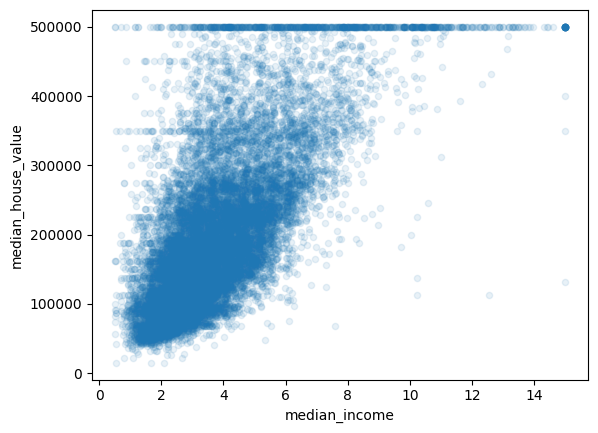

In [21]:
# Since the highest correlation is between `median_house_value` and `median_income` plot separate graph
housing.plot(x="median_income", y="median_house_value", kind="scatter", alpha=0.1)

### Exploring Feature Combinations

In [22]:
# How many rooms per household? How many bedrooms per total number of rooms? What is the population per household?
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_rooms"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [23]:
# Compute correlation matrix
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_rooms         -0.259952
Name: median_house_value, dtype: float64

## Data Cleaning

In [24]:
# Copy `strata_train_set` and separate predictors and target values
housing = strata_train_set.drop("median_house_value", axis=1)
housing_targets = strata_train_set["median_house_value"].copy()

In [25]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


Cleaning NaN values options: removing rows with NaN values, removing `total_bedrooms` feature, or replacing values with some value.Remove categorical feature since median can't be computed on it.

In [26]:
housing_num = housing.drop("ocean_proximity", axis=1)
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [27]:
# Replace NaN values using median value
imputer = SimpleImputer(strategy="median")
imputer.fit(housing_num)
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [28]:
X = imputer.transform(housing_num)
housing_trans = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [29]:
housing_trans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


### Handling Categorical Attributes

In [30]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head()

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN


Use one-hot encoding to create dummy attributes

In [31]:
encoder = OneHotEncoder()
housing_encod = encoder.fit_transform(housing_cat)
housing_encod

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [32]:
# Convert sparse matrix that stores only locations of the nonzero elements to dense NumPy array
housing_encod.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [33]:
# Get the list of categories
encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Create Custom Transformer for Adding Combined Features

In [34]:
col_names = "total_rooms", "total_bedrooms", "population", "households"

# Get indices of columns using list comprehension
idx_rooms, idx_bedrooms, idx_population, idx_households = [housing.columns.get_loc(idx) for idx in col_names]

# Transformer class that adds combined features
class CombineFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedroom=True): # no *args or **kwargs
        self.add_bedroom = add_bedroom
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        pop_per_household = X[:, idx_population] / X[:, idx_households]
        rooms_per_household = X[:, idx_rooms] / X[:, idx_households]
        if self.add_bedroom:
            bedroom_per_room = X[:, idx_bedrooms] / X[:, idx_rooms]
            # Translates slice objects to concatenation along the second axis.
            return np.c_[X, pop_per_household, rooms_per_household, bedroom_per_room]
        else:
            return np.c_[X, pop_per_household, rooms_per_household]
        
add_feature = CombineFeatures(add_bedroom=False)
housing_extended = add_feature.transform(housing.values)

In [35]:
type(housing_extended)

numpy.ndarray

In [36]:
# Convert numpy array to DataFrame to recover column names
housing_extended = pd.DataFrame(housing_extended,
                                columns=list(housing.columns)+["pop_per_household", "rooms_per_household"],
                                index=housing.index)
housing_extended.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,pop_per_household,rooms_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,3.168555,5.485836
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,2.623698,6.927083
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,2.223333,5.393333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,1.859213,3.886128
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,3.167241,6.096552


### Using Pipelines for Transformation

In [37]:
# Pipeline for numerical features
pipeline_num = Pipeline([
    ("imputer", SimpleImputer(strategy="median")), 
    ("add_feature", CombineFeatures()), 
    ("scaler", StandardScaler())
])

num_features = list(housing_num)
cat_features = ["ocean_proximity"]

pipeline_complete = ColumnTransformer([("num", pipeline_num, num_features), 
                                       ("cat", OneHotEncoder(), cat_features)
                                      ])

housing_complete = pipeline_complete.fit_transform(housing)

In [38]:
type(housing_complete)

numpy.ndarray

## Train Linear Regression Model

In [39]:
lin_regressor = LinearRegression()
lin_regressor.fit(housing_complete, housing_targets)

LinearRegression()

In [40]:
# Test the model on a few instances
data_check = housing.iloc[:3]
target_check = housing_targets.iloc[:3]
data_check_complete = pipeline_complete.transform(data_check)
data_pred = lin_regressor.predict(data_check_complete)
print(f"Predictions: {data_pred}")
print(f"Target values: {list(target_check)}")

Predictions: [ 85657.90192014 305492.60737488 152056.46122456]
Target values: [72100.0, 279600.0, 82700.0]


### Evaluate Prediction Error - RMSE

In [41]:
housing_pred = lin_regressor.predict(housing_complete)
lin_reg_mse = mean_squared_error(housing_targets, housing_pred)
lin_reg_rmse = np.sqrt(lin_reg_mse)
lin_reg_rmse

68627.87390018745

The RMSE of \\$68628 is high since `median_house_value` ranges between \\$120000 and \\$265000. Model underfitting - try more powerful model.

## Train Decision Tree Model

In [42]:
tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(housing_complete, housing_targets)

DecisionTreeRegressor()

In [43]:
# Test the model on a few instances
data_check = housing.iloc[:3]
target_check = housing_targets.iloc[:3]
data_check_complete = pipeline_complete.transform(data_check)
data_pred = tree_regressor.predict(data_check_complete)
print(f"Predictions: {data_pred}")
print(f"Target values: {list(target_check)}")

Predictions: [ 72100. 279600.  82700.]
Target values: [72100.0, 279600.0, 82700.0]


### Evaluate RMSE

In [44]:
housing_pred = tree_regressor.predict(housing_complete)
tree_mse = mean_squared_error(housing_targets, housing_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

The RMSE zero shows that model probably overfitted data.

### Evaluate Decision Tree Model Using Cross-Validation

In [45]:
# Since utility function is expected the scoring function will be negative MSE
tree_score = cross_val_score(tree_regressor, housing_complete, housing_targets, cv=10, scoring="neg_mean_squared_error")
tree_rmse_score = np.sqrt(-tree_score)

In [46]:
def get_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [47]:
get_scores(tree_rmse_score)

Scores:  [72632.60653288 71155.80551005 69791.96221883 71072.72428755
 70543.92251754 78231.38103251 71830.21652972 73298.27406329
 69153.09970514 70524.84203418]
Mean:  71823.48344316876
Standard deviation:  2438.89505707576


Decision tree model performed worse than linear regression model.

### Evaluate Linear Regression Model Using Cross-Validation

In [48]:
lin_score = cross_val_score(lin_regressor, housing_complete, housing_targets, cv=10, scoring="neg_mean_squared_error")
lin_rmse_score = np.sqrt(-lin_score)

In [49]:
get_scores(lin_rmse_score)

Scores:  [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean:  69104.07998247063
Standard deviation:  2880.3282098180657


## Train Random Forest Model

In [50]:
forest_regressor = RandomForestRegressor()
forest_regressor.fit(housing_complete, housing_targets)

RandomForestRegressor()

In [51]:
housing_pred = forest_regressor.predict(housing_complete)
forest_mse = mean_squared_error(housing_targets, housing_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18605.677119293756

### Evaluate Random Forest Model Using Cross-Validation

In [52]:
forest_score = cross_val_score(forest_regressor, housing_complete, housing_targets, cv=10, scoring="neg_mean_squared_error")
forest_rmse_score = np.sqrt(-forest_score)

In [53]:
get_scores(forest_rmse_score)

Scores:  [51507.74396919 49077.36370167 46766.59311498 52176.11438608
 47489.71826964 51422.16471528 52342.90209737 49602.74577006
 48289.80440756 53757.98911959]
Mean:  50243.31395514235
Standard deviation:  2207.741966465273


This model performs better but it is still overfitting since score on the training set is much lower than on the validation set.

## Fine Tune Random Forest Model

In [54]:
grid_param = [
    {"n_estimators": [3, 10, 30], "max_features": [2, 4, 6, 8]}, 
    {"bootstrap": [False], "n_estimators": [3, 10], "max_features": [2, 3, 4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, grid_param, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(housing_complete, housing_targets)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [55]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [56]:
# Since these were the maximum values selected search with higher values
grid_param_2 = [{"n_estimators": [50, 80, 100], "max_features": [10, 14, 20]}]

grid_search_2 = GridSearchCV(forest_reg, grid_param_2, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search_2.fit(housing_complete, housing_targets)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [10, 14, 20],
                          'n_estimators': [50, 80, 100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [57]:
grid_search_2.best_params_

{'max_features': 10, 'n_estimators': 80}

In [58]:
grid_search_2.best_estimator_

RandomForestRegressor(max_features=10, n_estimators=80)

In [59]:
result_cv = grid_search_2.cv_results_
for mean_score, params in zip(result_cv["mean_test_score"], result_cv["params"]):
    print(np.sqrt(-mean_score), params)

49988.993696196296 {'max_features': 10, 'n_estimators': 50}
49630.07388530171 {'max_features': 10, 'n_estimators': 80}
49746.669656600454 {'max_features': 10, 'n_estimators': 100}
50570.287532964525 {'max_features': 14, 'n_estimators': 50}
50336.36911873757 {'max_features': 14, 'n_estimators': 80}
50310.82879605879 {'max_features': 14, 'n_estimators': 100}
50903.45171660134 {'max_features': 20, 'n_estimators': 50}
50640.95956045538 {'max_features': 20, 'n_estimators': 80}
50601.82511922596 {'max_features': 20, 'n_estimators': 100}


After fine tunning slightly better result is achieved with the hyperparameters max_features: 10 and n_estimators: 80

### Look at Feature Importance

In [60]:
feature_importance = grid_search_2.best_estimator_.feature_importances_
added_features = ["pop_per_household", "rooms_per_household", "bedrooms_per_room"]
cat_encoder = pipeline_complete.named_transformers_["cat"]
cat_features = list(cat_encoder.categories_[0])
features = num_features + added_features + cat_features
sorted(zip(feature_importance, features), reverse=True)

[(0.41674344032826804, 'median_income'),
 (0.14650395110283437, 'INLAND'),
 (0.11343302201894805, 'pop_per_household'),
 (0.0634558042871159, 'longitude'),
 (0.05791178678298474, 'latitude'),
 (0.052284792499956836, 'bedrooms_per_room'),
 (0.044189863556072725, 'housing_median_age'),
 (0.03801797845092586, 'rooms_per_household'),
 (0.014587832575373239, 'total_rooms'),
 (0.01390820377283557, 'total_bedrooms'),
 (0.013824115725307298, 'households'),
 (0.013811318682897075, 'population'),
 (0.006207331242939889, '<1H OCEAN'),
 (0.0030518990029717143, 'NEAR OCEAN'),
 (0.001970704147567609, 'NEAR BAY'),
 (9.795582300119238e-05, 'ISLAND')]

## Evaluate Model on the Test Set

In [61]:
final_model = grid_search_2.best_estimator_

X_test = strata_test_set.drop("median_house_value", axis=1)
y_test = strata_test_set["median_house_value"].copy()

X_test_final = pipeline_complete.transform(X_test)
y_pred = final_model.predict(X_test_final)

mse_final = mean_squared_error(y_test, y_pred)
rmse_final = np.sqrt(mse_final)
rmse_final

47443.9440841613

In [62]:
# Find the confidence interval
confidence = 0.95
squared_error = (y_pred - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_error)-1, loc=squared_error.mean(), scale=stats.sem(squared_error)))

array([45478.58292699, 49331.06683901])

## Pipeline with Both Preparation and Prediction

In [65]:
full_pipeline_predictor = Pipeline([
    ("prepare", pipeline_complete),
    ("linear", LinearRegression())
])
full_pipeline_predictor.fit(housing, housing_targets)
full_pipeline_predictor.predict(data_check)

array([ 85657.90192014, 305492.60737488, 152056.46122456])

In [66]:
my_model = full_pipeline_predictor

import joblib
joblib.dump(my_model, "my_model.pkl")

['my_model.pkl']

In [67]:
my_model_loaded = joblib.load("my_model.pkl")

## Support Vector Machine Model

In [69]:
# Use different kernels like "linear" and "rbf" and various gamma and C hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = [
    {"kernel": ["linear"], "C": [10, 50, 100, 500, 1000, 5000, 10000, 50000]},
    {"kernel": ["rbf"], "C": [1, 5, 10, 50, 100, 500, 1000], "gamma": [0.01, 0.05, 0.1, 0.5, 1, 5]}
]
svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring="neg_mean_squared_error", verbose=2)
grid_search.fit(housing_complete, housing_targets)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ................................C=10, kernel=linear; total time=   4.2s
[CV] END ................................C=10, kernel=linear; total time=   4.1s
[CV] END ................................C=10, kernel=linear; total time=   4.2s
[CV] END ................................C=10, kernel=linear; total time=   4.2s
[CV] END ................................C=10, kernel=linear; total time=   4.5s
[CV] END ................................C=50, kernel=linear; total time=   4.1s
[CV] END ................................C=50, kernel=linear; total time=   4.0s
[CV] END ................................C=50, kernel=linear; total time=   4.0s
[CV] END ................................C=50, kernel=linear; total time=   4.1s
[CV] END ................................C=50, kernel=linear; total time=   4.1s
[CV] END ...............................C=100, kernel=linear; total time=   4.2s
[CV] END ...............................C=100, 

[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   7.3s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   7.3s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   7.2s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   7.3s
[CV] END .......................C=10, gamma=0.05, kernel=rbf; total time=   6.9s
[CV] END .......................C=10, gamma=0.05, kernel=rbf; total time=   6.9s
[CV] END .......................C=10, gamma=0.05, kernel=rbf; total time=   6.8s
[CV] END .......................C=10, gamma=0.05, kernel=rbf; total time=   6.9s
[CV] END .......................C=10, gamma=0.05, kernel=rbf; total time=   6.9s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   6.8s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   6.8s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   6.9s
[CV] END ...................

[CV] END .......................C=500, gamma=0.1, kernel=rbf; total time=   6.7s
[CV] END .......................C=500, gamma=0.1, kernel=rbf; total time=   6.6s
[CV] END .......................C=500, gamma=0.5, kernel=rbf; total time=   6.5s
[CV] END .......................C=500, gamma=0.5, kernel=rbf; total time=   6.6s
[CV] END .......................C=500, gamma=0.5, kernel=rbf; total time=   6.5s
[CV] END .......................C=500, gamma=0.5, kernel=rbf; total time=   6.6s
[CV] END .......................C=500, gamma=0.5, kernel=rbf; total time=   6.4s
[CV] END .........................C=500, gamma=1, kernel=rbf; total time=   6.4s
[CV] END .........................C=500, gamma=1, kernel=rbf; total time=   6.5s
[CV] END .........................C=500, gamma=1, kernel=rbf; total time=   6.4s
[CV] END .........................C=500, gamma=1, kernel=rbf; total time=   6.5s
[CV] END .........................C=500, gamma=1, kernel=rbf; total time=   6.5s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10, 50, 100, 500, 1000, 5000, 10000, 50000],
                          'kernel': ['linear']},
                         {'C': [1, 5, 10, 50, 100, 500, 1000],
                          'gamma': [0.01, 0.05, 0.1, 0.5, 1, 5],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [70]:
# Find the best score for the model evaluated using 5-fold cross validation
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

70285.63864308997

In [71]:
# Find the best hyperparameters
grid_search.best_params_

{'C': 50000, 'kernel': 'linear'}

In [72]:
param_grid = [
    {"kernel": ["linear"], "C": [50000, 100000, 500000]}
]
svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring="neg_mean_squared_error", verbose=2)
grid_search.fit(housing_complete, housing_targets)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .............................C=50000, kernel=linear; total time=  11.9s
[CV] END .............................C=50000, kernel=linear; total time=  11.6s
[CV] END .............................C=50000, kernel=linear; total time=  10.2s
[CV] END .............................C=50000, kernel=linear; total time=  10.5s
[CV] END .............................C=50000, kernel=linear; total time=  11.8s
[CV] END ............................C=100000, kernel=linear; total time=  17.5s
[CV] END ............................C=100000, kernel=linear; total time=  18.9s
[CV] END ............................C=100000, kernel=linear; total time=  16.4s
[CV] END ............................C=100000, kernel=linear; total time=  17.9s
[CV] END ............................C=100000, kernel=linear; total time=  17.7s
[CV] END ............................C=500000, kernel=linear; total time= 1.1min
[CV] END ............................C=500000, ke

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [50000, 100000, 500000], 'kernel': ['linear']}],
             scoring='neg_mean_squared_error', verbose=2)

In [73]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

70285.0398656796

In [74]:
grid_search.best_params_

{'C': 100000, 'kernel': 'linear'}

In [75]:
svm_model_save = grid_search
joblib.dump(svm_model_save, "svm_model.pkl")

['svm_model.pkl']

### Randomized Search CV

In [78]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# Use probability distribution functions such as expon() and reciprocal()
params_distributions = {
    "kernel": ["linear", "rbf"],
    "C": reciprocal(20, 200000),
    "gamma": expon(scale=1.0), # used for "rbf" kernel
}
random_search = RandomizedSearchCV(svm_reg, 
                                   param_distributions=params_distributions, 
                                  n_iter=50, cv=5,
                                  scoring="neg_mean_squared_error",
                                  verbose=2, random_state=42)
random_search.fit(housing_complete, housing_targets)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   4.4s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   4.3s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   4.3s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   4.2s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   4.2s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   7.7s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   7.7s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   7.9s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   8.0s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   7.9s
[CV] END C=84.14107900575871, gamma=0.059838768608680676, 

[CV] END C=8935.505635947808, gamma=0.37354658165762367, kernel=rbf; total time=   6.6s
[CV] END C=8935.505635947808, gamma=0.37354658165762367, kernel=rbf; total time=   6.6s
[CV] END C=8935.505635947808, gamma=0.37354658165762367, kernel=rbf; total time=   6.6s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=   4.1s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=   4.1s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=   4.1s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=   4.2s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=   4.1s
[CV] END C=151136.20282548846, gamma=1.4922453771381408, kernel=rbf; total time= 1.2min
[CV] END C=151136.20282548846, gamma=1.4922453771381408, kernel=rbf; total time= 1.1min
[CV] END C=151136.20282548846, gamma=1.4922453771381408, kernel=rbf; total time= 1.2min
[CV] END C=151136.2028

[CV] END C=60.17373642891687, gamma=1.2491263443165994, kernel=linear; total time=   4.2s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=   6.7s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=   6.8s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=   6.8s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=   6.8s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=   6.7s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=   4.4s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=   4.5s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=   4.3s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=   4.4s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=   4.3s
[CV] END C=55.538389

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000023AD7EBAB90>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000023ADA637340>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

The best score evaluated using 5-fold cross validation is following.

In [79]:
neg_mse = random_search.best_score_
rmse = np.sqrt(-neg_mse)
rmse

54751.69009256622

The best hyperparameters found are as follows.

In [80]:
random_search.best_params_

{'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

Randomized search found better parameters for "rbf" kernel than one for the Grid search.

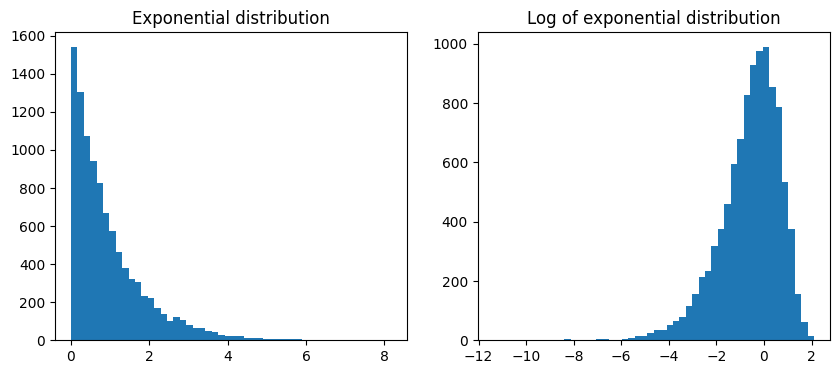

In [81]:
# Look at the exponential distribution with scale=1.0 used for gamma and its log
expon_dist = expon(scale=1)
samples = expon_dist.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.hist(samples, bins=50)
plt.title("Exponential distribution")
plt.subplot(122)
plt.hist(np.log(samples), bins=50)
plt.title("Log of exponential distribution")
plt.show()

Look at the reciprocal distribution used for C hyperparameter where the scale of samples is picked from a uniform distribution. It is useful when we don't know what the scale of the hyperparameter should be, whereas the exponential distribution is best we more or less know what the scale of hyperparameter should be.

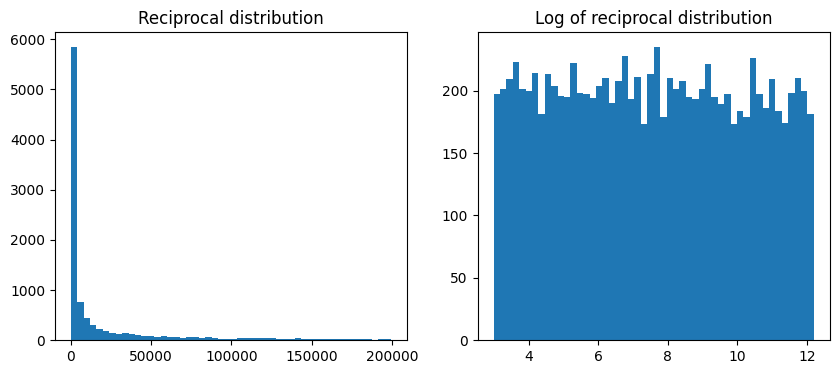

In [82]:
recip_dist = reciprocal(20, 200000)
samples = recip_dist.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.hist(samples, bins=50)
plt.title("Reciprocal distribution")
plt.subplot(122)
plt.hist(np.log(samples), bins=50)
plt.title("Log of reciprocal distribution")
plt.show()

## Add Custom Transformer that Selects the Most Important Features

Use `feature_importance` from `RandomForestRegressor` to find top features.

Prepare class `TopFeatureSelector` that is using utility classes from scikit learn `BaseEstimator` for `get_params` and `set_params` methods and `TransformerMixin` for `fit_transform` method.

In [83]:
from sklearn.base import BaseEstimator, TransformerMixin

def top_feature_indices(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importance, k):
        self.feature_importance = feature_importance
        self.k = k
        
    def fit(self, X, y=None):
        self.feature_indices_ = top_feature_indices(self.feature_importance, self.k)
        return self
    
    def transform(self, X):
        return X[:, self.feature_indices_]

In [84]:
# Define the number of top features
k = 5

In [85]:
# Find indices of top k features using feature_importance from RandomForestRegressor
top_k_feature_indices = top_feature_indices(feature_importance, k)
top_k_feature_indices

array([ 0,  1,  7,  8, 12], dtype=int64)

In [86]:
# From correlation exploration take chosen attributes called "features"
np.array(features)[top_k_feature_indices]

array(['longitude', 'latitude', 'median_income', 'pop_per_household',
       'INLAND'], dtype='<U19')

In [87]:
# Double check if these are top k features
sorted(zip(feature_importance, features), reverse=True)[:k]

[(0.41674344032826804, 'median_income'),
 (0.14650395110283437, 'INLAND'),
 (0.11343302201894805, 'pop_per_household'),
 (0.0634558042871159, 'longitude'),
 (0.05791178678298474, 'latitude')]

In [88]:
# This looks good. Next step is to create a new pipeline based on the previous pipeline_complete and that adds top k features.
feature_selection_pipeline = Pipeline([
    ("preparation", pipeline_complete),
    ("feature_selection", TopFeatureSelector(feature_importance, k))
])
housing_complete_top_features = feature_selection_pipeline.fit_transform(housing)

# Look at the first 3 instances
housing_complete_top_features[0:3]

array([[-0.94135046,  1.34743822, -0.8936472 ,  0.00622264,  1.        ],
       [ 1.17178212, -1.19243966,  1.292168  , -0.04081077,  0.        ],
       [ 0.26758118, -0.1259716 , -0.52543365, -0.07537122,  1.        ]])

In [89]:
# Check if these are the top k features
housing_complete[0:3, top_k_feature_indices]

array([[-0.94135046,  1.34743822, -0.8936472 ,  0.00622264,  1.        ],
       [ 1.17178212, -1.19243966,  1.292168  , -0.04081077,  0.        ],
       [ 0.26758118, -0.1259716 , -0.52543365, -0.07537122,  1.        ]])

Looks good!

## Pipeline with Full Data Preparation and the Final Prediction 

In [91]:
# Using randomized search SVM
predict_pipeline = Pipeline([
    ("preparation", pipeline_complete),
    ("feature_selection", TopFeatureSelector(feature_importance, k)),
    ("svm_reg", SVR(**random_search.best_params_))
])
predict_pipeline.fit(housing, housing_targets)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('add_feature',
                                                                   CombineFeatures()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat', OneHotEncoder(),
                                                  ['ocean_prox...
                 TopFeatureSelector(feature_importance=array([6.34558043e-02, 5.79117868e-02, 4.41898636e-02, 1.45878326e-02,
       1.39082038e-02, 1.38113187e-02, 1.38241157e-02, 4.16743440e-01,
       1.13433022e-01, 3.80179785e-02, 5.22847925e-02, 6.20733124e-03,
       1.46503951e-01, 9.79558230e-05, 1.97070415e-03, 3.05189900e-03]),
                                    k=5)),
                ('svm_reg',
                 SVR(C=157055.10989448498, gamma=0.26497040005002437))])

In [97]:
# Test pipeline on a few instances
data_check = housing.iloc[:4]
data_targets = housing_targets[:4]
print("Predictions:\t", predict_pipeline.predict(data_check))
print("Labels:\t", list(data_targets))

Predictions:	 [ 83384.49158095 299407.90439234  92272.03345143 150173.16199041]
Labels:	 [72100.0, 279600.0, 82700.0, 112500.0]


Results look ok when `SVR` but it could be better with `RandomForestRegressor`

In [99]:
# Using grid search Random Forest
predict_pipeline = Pipeline([
    ("preparation", pipeline_complete),
    ("feature_selection", TopFeatureSelector(feature_importance, k)),
    ("random_forest_reg", RandomForestRegressor(**grid_search_2.best_params_))
])
predict_pipeline.fit(housing, housing_targets)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('add_feature',
                                                                   CombineFeatures()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat', OneHotEncoder(),
                                                  ['ocean_prox...
                 TopFeatureSelector(feature_importance=array([6.34558043e-02, 5.79117868e-02, 4.41898636e-02, 1.45878326e-02,
       1.39082038e-02, 1.38113187e-02, 1.38241157e-02, 4.16743440e-01,
       1.13433022e-01, 3.80179785e-02, 5.22847925e-02, 6.20733124e-03,
       1.46503951e-01, 9.79558230e-05, 1.97070415e-03, 3.05189900e-03]),
                                    k=5)),
                ('random_forest_reg',
                 RandomForestRegressor(max_features=10, n_estimators=80))])

In [100]:
# Repeat pipeline test on a few instances
data_check = housing.iloc[:4]
data_targets = housing_targets[:4]
print("Predictions:\t", predict_pipeline.predict(data_check))
print("Labels:\t", list(data_targets))

Predictions:	 [ 74885.     304801.2625  84408.75   121941.25  ]
Labels:	 [72100.0, 279600.0, 82700.0, 112500.0]


As expected results look better with `RandomForestRegressor`.

## Automatically Explore Preparation Options Using `GridSearchCV` 

In [103]:
# Use `named_transforemers_` attribute to access the named steps in pipeline with setting `handle_unknown` to ignore to avoid warnings during training
pipeline_complete.named_transformers_["cat"].handle_unknown = "ignore"

param_grid = [{
    "preparation__num__imputer__strategy": ["mean", "median", "most_frequent"],
    "feature_selection__k": list(range(1, len(feature_importance) + 1))
}]

grid_search_prep = GridSearchCV(predict_pipeline, param_grid, cv=5, scoring="neg_mean_squared_error", verbose=2)
grid_search_prep.fit(housing, housing_targets)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\ttomk\anaconda3\li

[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   1.5s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   1.5s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   1.5s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   1.5s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   1.5s


C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\ttomk\anaconda3\li

[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   1.4s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   1.5s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   1.5s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   1.5s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   1.5s


C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\ttomk\anaconda3\li

[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=   1.5s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=   1.5s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=   1.4s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=   1.5s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=   1.5s


C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\ttomk\anaconda3\li

[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=   1.5s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=   1.5s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=   1.5s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=   1.5s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=   1.5s


C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\ttomk\anaconda3\li

[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=   1.5s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=   1.5s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=   1.5s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=   1.5s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=   1.5s


C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\ttomk\anaconda3\li

[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=   1.5s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=   1.5s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=   1.5s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=   1.5s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=   1.5s


C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\ttomk\anaconda3\li

[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=   2.7s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=   2.8s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=   2.8s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=   2.7s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=   2.8s


C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\ttomk\anaconda3\li

[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=   2.7s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=   2.8s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=   2.8s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=   2.8s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=   2.7s


C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\ttomk\anaconda3\li

[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=   2.7s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=   2.7s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=   2.8s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=   2.8s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=   2.7s


C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\ttomk\anaconda3\li

[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=   3.2s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=   3.3s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=   3.3s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=   3.3s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=   3.4s


C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\ttomk\anaconda3\li

[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=   3.4s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=   3.4s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=   3.3s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=   3.4s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=   3.4s


C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\ttomk\anaconda3\li

[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=   3.4s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=   3.4s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=   3.3s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=   3.4s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=   3.4s


C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\ttomk\anaconda3\li

[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=   3.9s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=   4.0s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=   3.9s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=   4.0s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=   4.0s


C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\ttomk\anaconda3\li

[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=   3.9s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=   4.0s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=   4.0s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=   4.0s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=   3.9s


C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\ttomk\anaconda3\li

[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=   3.9s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=   4.0s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=   3.9s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=   3.9s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=   3.9s


C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\ttomk\anaconda3\li

[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=   5.0s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=   5.1s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=   5.1s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=   5.2s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=   5.2s


C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\ttomk\anaconda3\li

[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=   5.1s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=   5.2s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=   5.2s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=   5.2s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=   5.2s


C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\ttomk\anaconda3\li

[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=   5.1s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=   5.2s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=   5.2s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=   5.2s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=   5.1s


C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\ttomk\anaconda3\li

[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=   5.6s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=   5.8s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=   5.7s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=   5.7s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=   5.7s


C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\ttomk\anaconda3\li

[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=   5.5s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=   5.6s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=   5.5s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=   5.6s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=   5.6s


C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\ttomk\anaconda3\li

[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=   5.6s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=   5.7s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=   5.6s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=   5.7s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=   5.7s


C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\ttomk\anaconda3\li

[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=   6.7s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=   6.8s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=   6.7s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=   6.7s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=   6.8s


C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\ttomk\anaconda3\li

[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=   6.7s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=   6.8s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=   6.7s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=   6.8s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=   6.8s


C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\ttomk\anaconda3\li

[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=   6.6s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=   6.7s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=   6.6s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=   6.7s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=   6.8s


C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\ttomk\anaconda3\li

[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=   7.8s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=   7.9s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=   7.9s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=   7.9s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=   7.8s


C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\ttomk\anaconda3\li

[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=   7.8s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=   7.8s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=   7.9s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=   7.9s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=   7.8s


C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\ttomk\anaconda3\li

[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=   7.7s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=   7.7s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=   7.7s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=   7.8s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=   7.9s


C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\ttomk\anaconda3\li

[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=   8.8s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=   8.8s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=   8.7s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=   8.8s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=   8.7s


C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\ttomk\anaconda3\li

[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=   8.7s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=   8.9s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=   9.0s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=   8.9s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=   8.9s


C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\ttomk\anaconda3\li

[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=   8.7s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=   8.7s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=   8.8s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=   9.0s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=   9.0s


C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\ttomk\anaconda3\li

[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=   8.9s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=   8.9s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=   8.9s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=   8.9s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=   8.9s


C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\ttomk\anaconda3\li

[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=   8.9s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=   9.0s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=   9.0s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=   8.8s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=   8.9s


C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\ttomk\anaconda3\li

[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=   8.8s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=   9.0s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=   8.9s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=   9.0s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=   8.9s


C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\ttomk\anaconda3\li

[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=   9.0s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=   8.9s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=   9.1s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=   9.1s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=   9.1s


C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\ttomk\anaconda3\li

[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=   9.0s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=   9.0s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=   8.9s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=   8.9s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=   9.1s


C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\ttomk\anaconda3\li

[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=   9.0s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=   9.1s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=   9.0s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=   9.0s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=   9.1s


C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\ttomk\anaconda3\li

[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=   8.4s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=   8.5s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=   8.4s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=   8.5s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=   8.4s


C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\ttomk\anaconda3\li

[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=   8.3s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=   8.4s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=   8.4s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=   8.5s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=   8.5s


C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "C:\Users\ttomk\anaconda3\li

[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=   8.4s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=   8.4s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=   8.4s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=   8.4s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=   8.5s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=   0.0s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=   8.0s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=   7.9s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=   8.0s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=   7.9s
[CV] 

C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
9 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\ttomk\anaconda

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('add_feature',
                                                                                          CombineFeatures()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['longitude',
                                                                          'latitude',
                                                                          'housing_median_age',
                                                                          'total_rooms',
                                                                          'total_bedrooms',
                                                                          'population',
                                                                          'households',
                                                                          'median_income']),
                                                                        ('cat',...
       1.13433022e-01, 3.80179785e-02, 5.22847925e-02, 6.20733124e-03,
       1.46503951e-01, 9.79558230e-05, 1.97070415e-03, 3.05189900e-03]),
                                                           k=5)),
                                       ('random_forest_reg',
                                        RandomForestRegressor(max_features=10,
                                                              n_estimators=80))]),
             param_grid=[{'feature_selection__k': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16],
                          'preparation__num__imputer__strategy': ['mean',
                                                                  'median',
                                                                  'most_frequent']}],
             scoring='neg_mean_squared_error', verbose=2)

In [104]:
grid_search_prep.best_params_

{'feature_selection__k': 1, 'preparation__num__imputer__strategy': 'mean'}